# Modelo 2

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd "/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto"
!ls

/content/drive/Shareddrives/IA - Detección de Plagio - 8vo/reto
3e6def38.java  base.csv    limpieza.ipynb  modelo2.ipynb    versions
548ffb07.java  base.ipynb  modelo1.ipynb   procesado.ipynb


In [23]:
# Cargar los datos
df = pd.read_csv('base.csv')

In [24]:
# Dividir el dataframe en train y test (75% train, 25% test)
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

# Obtener los datos de entrenamiento y prueba
train_data = train_df[['Code1', 'Code2']]
train_labels = train_df['Similitud']
test_data = test_df[['Code1', 'Code2']]
test_labels = test_df['Similitud']

In [25]:
# Convertir los valores de similitud en etiquetas binarias
binarizer = LabelBinarizer()
train_labels = binarizer.fit_transform(np.round(train_labels))
test_labels = binarizer.transform(np.round(test_labels))

# Tokenizar los códigos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['Code1'] + train_data['Code2'])
train_sequences = tokenizer.texts_to_sequences(train_data['Code1'] + train_data['Code2'])
test_sequences = tokenizer.texts_to_sequences(test_data['Code1'] + test_data['Code2'])

# Padding de las secuencias para que tengan la misma longitud
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_sequences = pad_sequences(train_sequences, maxlen=max_length)
test_sequences = pad_sequences(test_sequences, maxlen=max_length)

In [26]:
# Crear el modelo de red neuronal recurrente
model = Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(layers.LSTM(units=100))
model.add(layers.Dense(units=1, activation='sigmoid'))

# model = Sequential()
# model.add(layers.Embedding(len(tokenizer.word_index)+1, 100, input_length=max_length))
# model.add(layers.Convolution1D(256, 3, padding='same', strides = 1))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPool1D(pool_size=2))
# model.add(layers.GRU(256, dropout=0.2, recurrent_dropout=0.1, return_sequences = True))
# model.add(layers.GRU(256, dropout=0.2, recurrent_dropout=0.1))
# model.add(layers.Dense(units=1, activation='softmax'))

In [27]:
# Compilar y entrenar el modelo
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])


In [28]:
history = model.fit(train_sequences,
                    train_labels,
                    batch_size=32,
                    epochs=20,
                    validation_data=(test_sequences, test_labels))

Epoch 1/20
22/22 [==============================] - 18s 461ms/step - loss: 0.6911 - acc: 0.5388 - val_loss: 0.6824 - val_acc: 0.5702
Epoch 2/20
22/22 [==============================] - 8s 356ms/step - loss: 0.6475 - acc: 0.5900 - val_loss: 0.6710 - val_acc: 0.5482
Epoch 3/20
22/22 [==============================] - 9s 392ms/step - loss: 0.5400 - acc: 0.7350 - val_loss: 0.7065 - val_acc: 0.6228
Epoch 4/20
22/22 [==============================] - 8s 362ms/step - loss: 0.4686 - acc: 0.7643 - val_loss: 0.7600 - val_acc: 0.6140
Epoch 5/20
22/22 [==============================] - 8s 347ms/step - loss: 0.3902 - acc: 0.8184 - val_loss: 0.7336 - val_acc: 0.5746
Epoch 6/20
22/22 [==============================] - 8s 350ms/step - loss: 0.4285 - acc: 0.8199 - val_loss: 0.7034 - val_acc: 0.6096
Epoch 7/20
22/22 [==============================] - 8s 357ms/step - loss: 0.3775 - acc: 0.8404 - val_loss: 0.7718 - val_acc: 0.6272
Epoch 8/20
22/22 [==============================] - 8s 341ms/step - loss: 0

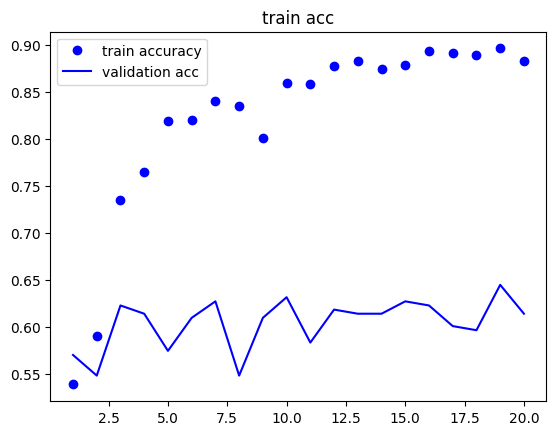

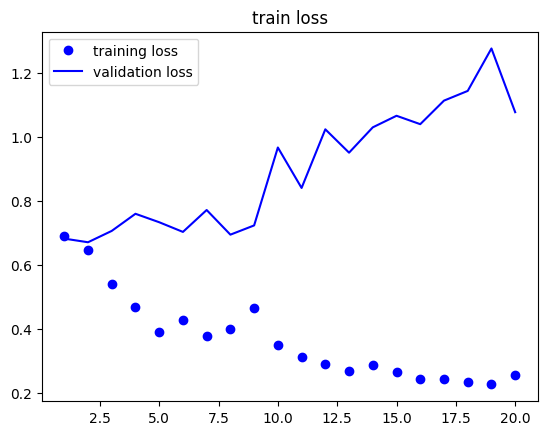

In [32]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc,'bo',label='train accuracy')
plt.plot(epochs, val_acc,'b',label='validation acc')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs, val_loss,'b',label='validation loss')
plt.title('train loss')
plt.legend()

plt.show()

In [33]:
loss, accuracy = model.evaluate(test_sequences, test_labels)
print("Precisión del modelo:", accuracy)

8/8 [==============================] - 1s 77ms/step - loss: 1.0776 - acc: 0.6140
Precisión del modelo: 0.6140350699424744
